# 1. Giảm chiều dữ liệu


## 1.1. Giảm chiều dữ liệu là gì ?

Có rất nhiều ví dụ về giảm chiều dữ liệu trong thực tiễn. Chẳng hạn như:

**Từ 2 chiều về 1 chiều**

Giả định dữ liệu đầu vào gồm $N$ điểm $\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_N$ được biểu diễn trong không gian hai chiều bởi hệ véc tơ cơ sở gồm hai véc tơ $\{x_1, x_2\}$. Trên đồ thị 2 chiều thì tập hợp những điểm này có xu hướng phân bố dọc theo một số chiều véc tơ nhất định chẳng hạn như $u_1$ trong hình minh họa.

![](https://imgur.com/9hUsWcu.jpg
)

**Hình 1:** Các điểm dữ liệu là những dấu `x`. Tập dữ liệu này có tính chất phân phối dọc theo phương véc tơ $u_1$ là đường thẳng màu đỏ.

Để giảm chiều dữ liệu, chúng ta sẽ thực hiện một phép chiếu từ mỗi điểm xuống véc tơ $u_1$. Từ dữ liệu gốc $\mathbf{x}_{i} \in \mathbb{R}^2$ ta thu được hình chiếu của chúng là giá trị $\mathbf{z}_i \in \mathbb{R}^1$ trên trục véc tơ $u_1$.



**Từ 3 chiều xuống 2 chiều**

![](https://www.researchgate.net/profile/Ken-Yano/publication/4371879/figure/fig1/AS:279414773436417@1443629081297/2D-mapping-3D-generic-face-model-M-is-mapped-to-a-planner-mesh-D-using-a-piecewise.png)

**Hình 2:** Các chiều của khuôn mặt trong không gian 3 chiều.

Trong hệ thống xác thực khuôn mặt (_face verification_) dữ liệu đầu vào là ảnh PointCloud 3D có thể được chiếu xuống không gian 2D để thu được hình ảnh theo phương chính diện mà vẫn giữ được những đặc trưng chính giúp xác thực khuôn mặt.







## 1.2. Mục đích của giảm chiều dữ liệu.

Những bộ dữ liệu lớn thường tiêu tốn nhiều bộ nhớ lưu trữ và thời gian huấn luyện. Do đó khi đối mặt với những bộ dữ liệu kích thước lớn chúng ta thường tìm cách giảm chiều dữ liệu từ không gian cao chiều (_high dimensionality_) xuống không gian thấp chiều (_low dimensionality_) mà vẫn giữ được những đặc trưng chính của dữ liệu nhưng tiết kiệm được chi phí huấn luyện và dự báo.

Lấy một ví dụ, giả sử bạn đang cần phân loại tác vụ ảnh với 1000 nhãn mục tiêu và kích thước ảnh đầu vào là `1000x1000x3`. Như vậy nếu véc tơ hóa ma trận ảnh ta thu được một véc tơ với kích thước 3 triệu chiều. Để xây dựng một mạng _thần kinh nơ ron nông_  (_shallow neural network_)với một layer kết nối toàn bộ 3 triệu điểm ảnh này tới 1000 nhãn mục tiêu sẽ cần số lượng tham số là 3 tỷ. Đây là một mạng nơ ron có kích thước quá lớn và thường vượt quá khả năng tính toán của các máy tính thông thường. Nếu huấn luyện được một mạng nơ ron khổng lồ như vậy thì khả năng mô hình gặp hiện tượng _overfitting_ cũng rất cao. Khi đối mặt với tình huống này chúng ta có thể sử dụng các phương pháp giảm chiều dữ liệu để đạt được hiệu quả tính toán và tránh _overfitting_.

Những bộ dữ liệu cao chiều cũng thường xuất hiện trong dữ liệu dạng bảng (_tabular data_).  Thông thường chúng ta sẽ không sử dụng toàn bộ các biến đầu vào mà thực hiện xếp hạng mức độ quan trọng của chúng nhằm lọc ra một phần nhỏ các biến được coi là quan trọng nhất và loại bỏ những biến nhiễu. Để xếp hạng mức độ quan trọng của biến bạn có thể xem lại nội dung chương [lựa chọn đặc trưng](https://phamdinhkhanh.github.io/deepai-book/ch_ml/FeatureEngineering.html#id3). Một cách khác cũng thường được thực hiện đó là giảm chiều dữ liệu. Phương pháp này không yêu cầu phải loại bỏ bất kì một biến đầu vào nào mà tất cả chúng sẽ được tận dụng nhằm tạo ra những biến được tổ hợp tuyến tính từ chúng. 

Trong bài toán phân cụm, các phương pháp giảm chiều dữ liệu có thể biến đổi dữ liệu về không gian hai chiều hoặc ba chiều nhằm biểu diễn dữ liệu một cách trực quan. Thông qua đó phát hiện được những bất thường dữ liệu (_anomaly detection_) và nhận biết phân bố cụm trong những bài toán học không giám sát.

Trong bài viết này chúng ta cùng tìm hiểu về thuật toán **PCA**, một phương pháp rất hiệu quả trong giảm chiều dữ liệu.







## 1.3. Phương pháp PCA

PCA là viết tắt của cụm từ _principal component analysis_. Thuật ngữ Tiếng Việt còn gọi là _phân tích thành phần chính_. Đây là một phương pháp giảm chiều dữ liệu (_dimensionality reduction_) tương đối hiệu quả dựa trên phép phân tích suy biến (_singular decomposition_) mà ở đó chúng ta sẽ chiếu các điểm dữ liệu trong không gian **cao chiều** xuống một số ít những véc tơ thành phần chính trong không gian **thấp chiều** mà đồng thời vẫn bảo toàn tối đa **độ biến động** của dữ liệu sau biến đổi. Ưu điểm của PCA đó là **sử dụng tất cả** các biến đầu vào nên phương pháp này không bỏ sót những biến quan trọng.

Để hiểu rõ về PCA trước tiên chúng ta sẽ cùng tìm hiểu về phương pháp phân tích suy biến (_Singular Decomposition - SVD_).




# 2. Phương pháp phân tích suy biến

## 2.1. Hệ trực giao và ma trận trực giao

Hệ trực giao và ma trận trực giao là những khái niệm cơ bản trong đại số tuyến tính. Thông qua hệ trực giao ta có thể tìm được hệ cơ sở của các không gian cao chiều.

**Hệ trực giao:** Một hệ véc tơ cơ sở $\{\mathbf{u}_1, \mathbf{u}_2, ..., \mathbf{u}_D\} \in \mathbb{R}^{K}$ được gọi là một *hệ trực giao* (_orthogonal_) nếu thỏa mãn hệ điều kiện:
$$\begin{cases}||\mathbf{u}_i||_2^2 > 0 \\
\mathbf{u}_{i}^{\intercal}\mathbf{u}_{j} = 0 ~ \forall i \neq j
\end{cases}$$

Ký hiệu $||\mathbf{u}_i||_2^2$ chính là bình phương của norm chuẩn bậc hai ($L_2$ norm) của véc tơ $\mathbf{u}_i$. Như vậy các chiều của hệ trực giao là vuông góc với nhau đôi một. 

**Hệ trực chuẩn:** *Hệ trực chuẩn* (_orthonormal_) là một trường hợp đặc biệt của hệ trực giao khi giá trị của chuẩn bậc hai $||\mathbf{u}_i||_2^2 = 1$ , $ \forall i$. Một tập hợp các véc tơ đơn vị bất kỳ $\{\mathbf{e}_1, \mathbf{e}_2, \dots, \mathbf{e}_{Q}\}$ trong không gian $K$ chiều ($Q \leq K$) sẽ tạo thành một hệ trực chuẩn.

**Ma trận trực giao:** *Ma trận trực giao* (_orthogonal matrix_) là ma trận vuông thỏa mãn các cột hoặc dòng của nó là một hệ trực chuẩn. Điều đó có nghĩa là một ma trận trực giao $\mathbf{U} \in \mathbb{R}^{D \times D}$ thoả mãn:

$$\mathbf{U}^{\intercal}\mathbf{U} = \mathbf{I}_{D}$$

Với $\mathbf{I}_D$ là ma trận đơn vị với kích thước $D$ chiều.

Một phép xoay dựa trên hệ trực chuẩn sẽ bảo toàn giá trị tích vô hướng giữa hai véc tơ. Tính chất thú vị này có thể chứng minh như sau:
Hai véc tơ bất kì $\mathbf{x}$ và $\mathbf{y}$ có kết quả khi thực hiện phép xoay theo ma trận trực giao $\mathbf{U}$ lần lượt là $\mathbf{U}\mathbf{x}$ và $\mathbf{U}\mathbf{y}$. Khi đó:

$$(\mathbf{U}\mathbf{x})^{\intercal}(\mathbf{U}\mathbf{y}) = \mathbf{x}^{\intercal}\mathbf{U}^{\intercal}\mathbf{U}\mathbf{y} = \mathbf{x}^{\intercal}\mathbf{I}_n\mathbf{y} = \mathbf{x}^{\intercal}\mathbf{y}$$

**Ma trận hiệp phương sai:**
Ma trận hiệp phương sai (_covariance matrix_) của một ma trận dữ liệu đầu vào $\mathbf{X} \in \mathbb{R}^{n \times d}$ có các véc tơ cột lần lượt là $[\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_d]$ là một ma trận vuông và bán xác định dương. Phần tử $\sigma_{ij}$ của ma trận hiệp phương sai của $\mathbf{X}$ chính là hiệp phương sai giữa hai véc tơ cột $\mathbf{x}_i$ và $\mathbf{x}_j$ theo công thức:

$$\sigma_{ij} = \text{cov}(\mathbf{x}_i, \mathbf{x}_j) = [\mathbf{x}_i-\mathbf{E}(\mathbf{x}_i)][\mathbf{x}_j-\mathbf{E}(\mathbf{x}_j)] = [\mathbf{x}_i-\bar{\mathbf{x}_i}][\mathbf{x}_j-\bar{\mathbf{x}_j}] \tag{1}$$

Với $\bar{\mathbf{x}_i}$ là véc tơ kích thước $d$ có các giá trị bằng nhau và bằng trung bình của véc tơ cột của $\mathbf{x}_i$.

Hiệp phương sai sẽ đo lường mối quan hệ cùng chiều hoặc nghịch chiều giữa hai biến. Hiệp phương sai của một biến với chính nó chính là phương sai đo lường mức độ biến động của biến. Ma trận hiệp phương sai sẽ cho ta biết quan hệ giữa các cột của ma trận và phương sai của từng cột.

Giả sử $\bar{\mathbf{X}} = [\bar{\mathbf{x}_1}, \bar{\mathbf{x}_2}, \dots, \bar{\mathbf{x}_d}]$ là ma trận trung bình của toàn bộ các quan sát của $\mathbf{X}$. Ma trận $\bar{\mathbf{X}}$ có các dòng là bằng nhau và bằng giá trị của điểm trung bình. Khi đó ma trận hiệp phương sai còn được tính theo công thức:

$$\text{cov}(\mathbf{X}, \mathbf{X}) = (\mathbf{X}-\bar{\mathbf{X}})^{\intercal}(\mathbf{X}-\bar{\mathbf{X}})$$

Ma trận hiệp phương sai ẩn chứa nhiều tính chất thú vị mà trong phương pháp PCA chúng ta sẽ có dịp gặp lại ma trận này.



**Ma trận đường chéo:** Một ma trận $\mathbf{D}$ là ma trận đường chéo khi các phần tử của nó thỏa mãn:
$$d_{ii} \neq 0, d_{ij} = 0 ~ \forall i \neq j$$
Hay nói cách khác ma trận có các phần tử trên đường chéo chính khác 0 và các phần tử còn lại bằng 0. Ma trận đường chéo có thể không vuông. Ma trận đơn vị $\mathbf{I}_n$ là một dạng ma trận đường chéo khi nó vừa là một ma trận vuông và đồng thời các phần tử trên đường chéo chính bằng 1. Ngoài ra ta có thể nhận thấy mối liên hệ giữa **ma trận trực giao** và **ma trận đường chéo** đó là một ma trận $\mathbf{U} \in \mathbb{R}^{D \times D}$ có các cột tạo thành một hệ trực giao thì tích của nó với ma trận chuyển vị của nó sẽ tạo thành một ma trận đường chéo.

$$\mathbf{U}^{\intercal}\mathbf{U} =
\begin{bmatrix}
    \mathbf{u}_1^2 & \mathbf{u}_1
    \mathbf{u}_2 & \mathbf{u}_1\mathbf{u}_3 & \dots  & \mathbf{u}_1\mathbf{u}_D \\
    \mathbf{u}_2 \mathbf{u}_1 & \mathbf{u}_2^2 & \mathbf{u}_2 \mathbf{u}_3 & \dots  & \mathbf{u}_2 \mathbf{u}_D \\
    \vdots & \vdots & \ddots & \vdots \\
    \mathbf{u}_D \mathbf{u}_1 & \mathbf{u}_D\mathbf{u}_2 & \mathbf{u}_D \mathbf{u}_3 & \dots  & \mathbf{u}_D^2 \\
\end{bmatrix} = 
\begin{bmatrix}
    \mathbf{u}_1^2 & 0 & 0 & \dots  & 0 \\
    0 & \mathbf{u}_2^2 & 0 & \dots  & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & 0 & \dots  & \mathbf{u}_D^2 \\
\end{bmatrix}
$$

## 2.2. Các tính chất liên quan tới trace của ma trận
**Trace của ma trận:** hàm *trace* của ma trận $\mathbf{A}$ kí hiệu là $\mathbf{trace(A)}$ là tổng của tất cả các phần tử trên đường chéo của ma trận đó. 
Một số đẳng thức của *trace*:

1. $\mathbf{trace(A) = trace(A^{\intercal})}$. Điều này là hiển nhiên do phép chuyển vị không làm thay đổi các vị trí trên đường chéo chính của $\mathbf{A}$.

2. $\mathbf{trace(AB) = trace(BA)}$. Chứng minh tính chất này khá đơn giản. Giả sử $\mathbf{A}^{(i)}$ là vector dòng thứ $i$ của $\mathbf{A}$ và $\mathbf{B}_{j}$ là vector cột thứ j của $\mathbf{B}$. Khi đó phần tử $AB_{ij}$ ở dòng thứ $i$ cột thứ $j$ của ma trận tích $\mathbf{AB}$ là:
$$AB_{ij} = \mathbf{A}^{(i)}\mathbf{B}_{j} = \sum_{k}(a_{ik}b_{kj})$$
Do đó:
$$\mathbf{trace(AB)} = \sum_{i} AB_{ii} = \sum_{i}\sum_{k}(a_{ik}b_{ki}) \tag{1}$$
Hoàn toàn biến đổi tương tự:
$$\mathbf{trace(BA)} = \sum_{i} BA_{ii} = \sum_{i}\sum_{k}(b_{ik}a_{ki}) \tag{2}$$
Ta nhận thấy chỉ số $i, k$ bình đẳng trong cả 2 biểu thức (1) và (2) nên nếu hoán vị $i$ và $k$ cho nhau không làm thay đổi kết quả tổng. Mặt khác phép hoán vị này sẽ biến biểu thức (1) thành (2) nên suy ra giá trị của 2 biểu thức là bằng nhau.
3. $\mathbf{trace(ABC) = trace(CAB) = trace(BCA)}$. Tính chất này suy ra từ tính chất 2.
4. $\mathbf{trace(A + B) = trace(A) + trace(B)}$. Dễ dàng suy ra tính chất này do $\mathbf{A, B}$ phải cùng kích thước và vị trí các phần tử trên đường chéo chính của 2 ma trận này là trùng nhau.


## 2.3. Véc tơ riêng và trị riêng
**Véc tơ riêng và trị riêng:** Véc tơ riêng của một ma trận vuông $\mathbf{A} \in \mathbb{R}^{n \times n}$ là một véc tơ đặc biệt vì nó sở hữu tính chất khi nhân với ma trận $\mathbf{A}$ thì kết quả thu được chính là véc tơ đó nhân với một đại lượng vô hướng $\lambda$:

$$\mathbf{Ax} = \lambda \mathbf{x}$$

Chúng ta gọi $\mathbf{x}$ là vector riêng (_Eigenvector_) ứng với trị riêng (_Eigenvalue_) $\lambda$.
Khai triển biểu thức trên để đưa về dạng tích của $\mathbf{x}$:
$$\begin{eqnarray}
\mathbf{Ax} - \lambda \mathbf{x} & = & 0\\
\mathbf{Ax} - \lambda \mathbf{I}_{n} \mathbf{x} & = & 0\\
(\mathbf{A} - \lambda \mathbf{I}_{n}) \mathbf{x} & = & 0 \tag{3}\\
\end{eqnarray}$$

Dòng thứ 2 đạt được là nhờ tích của một ma trận với ma trận đơn vị thì bằng chính nó ($\mathbf{I}_{n} $ là kí hiệu cho ma trận đơn vị bậc $n$).

Trị riêng và vector riêng của ma trận có những tính chất đặc biệt sau:

1. Nếu $\mathbf{x}$ là vector riêng tương ứng của trị riêng $\lambda$ thì $k\mathbf{x}$ cũng là một vector riêng của $\lambda$. Tính chất này cho thấy một trị riêng có thể có nhiều vector riêng. Tuy nhiên với một vector riêng chỉ có duy nhất một trị riêng.
2. Một ma trận có $n$ trị riêng bao gồm cả lặp lại và trị riêng phức. Điều này có được là vì trị riêng  là nghiệm của một đa thức bậc $n$. Thật vậy, biểu thức (3) về bản chât là tổ hợp tuyến tính của các cột ma trận $\mathbf{A} - \lambda \mathbf{I}_{n}$ với các phần tử của vector $\mathbf{x}$. Do kết quả bằng 0 nên các cột của ma trận $\mathbf{A} - \lambda \mathbf{I}_{n}$ là phụ thuộc tuyến tính. Từ đó suy ra $\mathbf{det}(\mathbf{A} - \lambda \mathbf{I}_{n}) = 0$. Triển khai định thức này ta thu được một đa thức $\mathbf{P}_{n}(\lambda)$ bậc $n$. Do đó ma trận có $n$ trị riêng bao gồm cả lặp và phức.
3. Khi ma trận $\mathbf{A}$ là ma trận đối xứng thì các trị riêng của $\mathbf{A}$ là các số thực.
4. Khi ma trận $\mathbf{A}$ là ma trận xác định dương thì các trị riêng của nó là các số thực dương và nếu ma trận $\mathbf{A}$ là ma trận bán xác định dương thì các trị riêng của nó không âm. Chứng minh như sau: $\lambda \mathbf{x^{\intercal}x} = \mathbf{x^{\intercal}Ax} > 0$ khi $\mathbf{A}$ xác định dương. Mặt khác $\lambda \mathbf{x^{\intercal}x} = \lambda \mathbf{|x|_{2}^2}, \mathbf{|x|_{2}^2} > 0 ~ \forall \mathbf{x} \neq 0$. Suy ra $\lambda > 0$, như vậy mọi trị riêng của $\mathbf{A}$ đều dương. Chứng minh tương tự cho trường hợp $\mathbf{A}$ bán xác định đương.
5. Tổng các phần tử trên đường chéo chính của ma trận $\mathbf{A} \in \mathbb{R}^{n \times n}$ thì bằng tổng các trị riêng. Để chứng minh công thức này cần sử dụng đến phép phân tích riêng sẽ được trình bày bên dưới. Khi ma trận $\mathbf{A}$ độc lập tuyến tính nó có thể biểu diễn dưới dạng phân tích riêng như sau:
$$\mathbf{A = PDP^{-1}}$$
Áp dụng hằng đẳng thức $\mathbf{trace(AB) = trace(BA)}$ ta có:

$$\mathbf{trace(A) = trace(PDP^{-1}) = trace((PD)P^{-1}) = trace(P^{-1}PD) = trace(D)}$$

Từ đó suy ra tổng các phần tử trên đường chéo chính của ma trận $\mathbf{A}$ bằng tổng các trị riêng.

6. Đinh thức của ma trận $\mathbf{A} \in \mathbb{R}^{n \times n}$ thì bằng tích các trị riêng của nó.
Sử dụng phép phân tích riêng đối với ma trận $\mathbf{A}$ độc lập tuyến tính ta có:
$$\mathbf{A = PDP^{-1}} \Rightarrow \mathbf{det(A) = det(PDP^{-1}) = det(P).det(D).det(P^{-1}) = det(D)} = \prod_{i=1}^n \lambda_i$$.

## 2.4. Phép phân tích riêng (_EigenDecomposition_)
**Phép phân tích riêng:** Phép phân tích riêng (EigenDecomposition) là một dạng phân rã ma trận (_matrix factorization_). Nó có mối liên hệ bền chặt với SVD mà chúng ta sẽ tìm hiểu bên dưới. Phép phân tích riêng sẽ phân tích một ma trận vuông độc lập tuyến tính $\mathbf{A} \in \mathbb{R}^{n \times n}$ thành tích của ma trận vuông $\mathbf{P} \in \mathbb{R}^{n \times n}$ khả nghịch với ma trận đường chéo $\mathbf{D} \in \mathbb{R}^{n \times n}$ theo công thức:
$$\mathbf{A} = \mathbf{PDP}^{-1}$$
Đẳng thức trên tương đương với:
$$\mathbf{AP} = \mathbf{PD}$$
Bây giờ ta chỉ xét đến cột thứ $i$ của cả 2 ma trận bên vế trái và phải:
$$\mathbf{Ap}_{i} = \mathbf{Pd}_{i}$$
Trong đó $\mathbf{p}_i$, $\mathbf{d}_{i}$ lần lượt là cột thứ $i$ của ma trận $\mathbf{P}$ và $\mathbf{D}$. Mặt khác do $\mathbf{D}$ là ma trận đường chéo nên $\mathbf{d}_{i}$ chỉ có duy nhất một phần tử khác 0 là $d_{ii}$ nên $\mathbf{Pd}_{i} = d_{ii}\mathbf{p}_{i}$. Như vậy:
$$\mathbf{A}\mathbf{p}_{i} = d_{ii}\mathbf{p}_{i}$$

Ta có thể thấy $d_{ii}$ chính là trị riêng của ma trận $\mathbf{A}$ và $\mathbf{p}_{i}$ là các vector riêng tương ứng của $d_{ii}$.

Như vậy điểm đặc biệt của phân tích riêng đó là đường chéo chính của $\mathbf{D}$ là các trị riêng của ma trận $\mathbf{A}$ và các cột của $\mathbf{P}$ là các vector riêng tương ứng với trị riêng nằm trên đường chéo chính. Ngoài ra phép phân tích riêng không là duy nhất. Nếu ma trận trực giao $\mathbf{P}$ thỏa mãn phương trình phân tích riêng thì ma trận $k\mathbf{P}$ cũng thỏa mãn phương trình phân tích riêng đó.

## 2.5. Phân tích suy biến (SVD)


Phép phân tích suy biến (_Singular Value Decomposition_) được viết tắt là `SVD` là một dạng `matrix factorization` khái quát hơn so với phép phân tích riêng đã trình bày ở trên. Theo đó phương pháp này cũng nhằm phân rã một ma trận thành tích của ba ma trận số thực hoặc số phức. Trong đó hai ma trận ở vị trí đầu tiên và cuối cùng là ma trận trực giao có thể không là khả nghịch của nhau và ở giữa là ma trận đường chéo có thể không vuông.

$$\mathbf{A}_{mn} = \mathbf{U}_{mm}\mathbf{\Sigma}_{mn}\mathbf{V}_{nn}^\mathbf{\intercal}$$

Kích thước ma trận được để ở bên dưới chân ma trận, tức là ma trận $\mathbf{A}_{mn} \in \mathbb{R}^{m \times n}$. Trong công thức trên thì $\mathbf{U}_{mm}, \mathbf{V}_{nn}$ là các ma trận trực giao và $\mathbf{\Sigma}_{mn}$ là ma trận đường chéo. 

![](https://raw.githubusercontent.com/phamdinhkhanh/MovieLen/master/svd2.png)

**Hình 3:** Minh họa biến đổi hình học của phép phân tích suy biến. (Nguồn [wikipedia](https://en.wikipedia.org/wiki/Singular_value_decomposition#/media/File:Singular-Value-Decomposition.svg))

Phép phân tích suy biến sẽ lần lượt trải qua:

* phép xoay (rotation): Từ một điểm dữ liệu $\mathbf{x} \in \mathbb{R}^m$ trong không gian gốc, chúng ta nhân với ma trận $\mathbf{U}_{mm}$ để thực hiện xoay trục. Tại phép biến đổi này không làm thay đổi tích vô hướng của hai điểm dữ liệu. Thật vậy, giả sử hai véc tơ $\mathbf{x}_i$ và $\mathbf{x}_j \in \mathbb{R}^{m}$. Phép xoay sẽ giúp biến đổi các véc tơ thành hai véc tơ mới là $\mathbf{y}_i=\mathbf{U}\mathbf{x}_i$ và $\mathbf{y}_j=\mathbf{U}\mathbf{x}_j$. Tích vô hướng của chúng:

$$\mathbf{y}_i^{\intercal}\mathbf{y}_j = \mathbf{x}_i^{\intercal}\mathbf{U}^{\intercal}\mathbf{U}\mathbf{x}_j = \mathbf{x}_i^{\intercal}\mathbf{I}_n\mathbf{x}_j = \mathbf{x}_i^{\intercal}\mathbf{x}_j$$

* phép nới rộng (scaling): Kết quả thu được sau phép xoay tiếp tục được nhân với ma trận đường chéo. Khi đó mỗi một chiều của dữ liệu sẽ được scale lên số lần chính bằng giá trị của trị riêng nằm trên đường chéo chính.
* Tiếp tục lại là một phép xoay: Sau phép nới rộng thì dữ liệu đã được chuyển về không gian thấp chiều. Ta lại tiếp tục thực hiện một phép xoay bằng cách nhân với ma trận $\mathbf{V}_{nn}$

## 2.6. Mối liên hệ giữa phân tích suy biến và phân tích riêng.

Ta có thể thấy phân tích suy biến khác với phân tích riêng ở chỗ nó áp dụng cho ma trận bất kì mà không yêu cầu ma trận đó phải vuông. Để thấy được mối liên hệ mật thiết giữa phép phân tích suy biến và phân tích riêng sau khi khai triển tích $\mathbf{A^{\intercal}A}$:

$$\begin{eqnarray}\mathbf{A^{\intercal}A} & = & \mathbf{(U\Sigma V^{\intercal})^{\intercal}}\mathbf{U\Sigma V^{\intercal}} \\
& = & \mathbf{V \Sigma^{\intercal}} \underbrace{\mathbf{U}^{\intercal}\mathbf{U}}_{\mathbf{I}_n} \mathbf{\Sigma V^{\intercal}} \\
& = & \mathbf{V \Sigma^{\intercal}}\mathbf{\Sigma V^{\intercal}}
\end{eqnarray}$$

Như vậy $\mathbf{A^{\intercal}A}$ là một phân tích riêng của ma trận trực giao $\mathbf{V}$ và ma trận đường chéo $\mathbf{\Sigma^{\intercal}\Sigma}$. Hoàn toàn tương tự ta cũng có $\mathbf{AA^{\intercal}}$ là một phân tích riêng của ma trận trực giao $\mathbf{U}$ và ma trận đường chéo $\mathbf{\Sigma\Sigma^{\intercal}}$. Ngoài ra $\mathbf{\Sigma^{\intercal}\Sigma}$ là một ma trận đường chéo có các thành phần trên đường chéo chính lần lượt là $\sigma_1^{2}, \sigma_2^{2},...,\sigma_{n}^2 > 0$. Các phần tử $\sigma_i$ trên đường chéo chính của $\mathbf{\Sigma}$ được gọi là giá trị suy biến (_singular values_) của ma trận $\mathbf{A}$. Các cột của ma trận $\mathbf{V}$ là hệ vector riêng ứng với trị riêng của $\mathbf{\Sigma^{\intercal}\Sigma}$ và còn được gọi là hệ vector suy biến trái (left-singular vectors). Các cột của $\mathbf{U}$ được gọi là hệ vector suy biến phải (_right-singular vectors_).


Một điều khá may mắn đó là trong python chúng ta có thể tính toán các ma trận $\mathbf{U}, \mathbf{V}$ và $\mathbf{\Sigma}$ trong phép phân tích suy biến của một ma trận bất kỳ thông qua module `scipy.linalg` chỉ với một vài dòng code.

In [ ]:

import scipy.linalg as ln
import numpy as np
m, n = 2, 3
n_diag = min(m, n)
#Init normal standard random variable A with size (m, n)
A = np.random.rand(m, n)
U, S_diag, V = ln.svd(A)
#Create diagonal matrix S based on diagonal
S = np.zeros((n_diag, n_diag))
np.fill_diagonal(S, S_diag)
if m > n:
    S = np.concatenate((S, np.zeros((1, n))), axis = 0)
elif m < n:
    S = np.concatenate((S, np.zeros((m, 1))), axis = 1)
        
print('Matrix A: \n %s \n'%A)
print('orthogonal matrix U: \n %s \n'%U)
print('Check Frobenius U^TU-I: \n %s \n'%ln.norm(np.dot(U.T,U)-np.eye(m, m), 'fro'))
print('orthogonal matrix V: \n %s \n'%V)
print('Check Frobenius V^TV-I: \n %s \n'%ln.norm(np.dot(V.T,V)-np.eye(n, n), 'fro'))
print('Diagonal matrix S: \n %s \n'%S_diag)
print('Matrix S: \n %s \n'%S)
print('Check Frobenius U.S.V - A: \n %s \n'%ln.norm(np.dot(U, S.dot(V))-A,'fro'))

# 3. Các dạng phân tích suy biến SVD

Thông thường việc phân tích suy biến một ma trận có kích thước lớn sẽ rất lâu vì trước tiên ta phải giải phương trình đặc trưng để tìm ra các giá trị đặc trưng, từ đó suy ra ma trận đường chéo $\mathbf{\Sigma}$. Tiếp theo để tìm ra ma trận trực giao $\mathbf{V}$ ta xuất phát từ phương trình $\mathbf{A^{\intercal}A} = \mathbf{V\Sigma^{\intercal}\Sigma V^{\intercal}}$ để suy ra 

$$\mathbf{A^{\intercal}AV} = \mathbf{V\Sigma^{\intercal}\Sigma}\underbrace{\mathbf{V}^{\intercal}\mathbf{V}}_{\mathbf{I}_n} = \mathbf{V\Sigma^{\intercal}\Sigma}$$

Như vậy đối với một cột $\mathbf{v}_i$ bất kỳ của ma trận $\mathbf{V}$ ta có:

$$\mathbf{A}^{\intercal}\mathbf{A} \mathbf{v}_i = \sigma_i^2\mathbf{v}_i$$

Hay nói cách khác các cột $\mathbf{v}_i$ chính là một véc tơ riêng ứng với trị riêng $\sigma_i^2$ của ma trận $\mathbf{A}^{\intercal}\mathbf{A}$.

Cách tìm ma trận $\mathbf{U}$ cũng được suy ra tương tự từ phương trình phân tích riêng $\mathbf{AA^{\intercal}} = \mathbf{U\Sigma\Sigma^{\intercal} U^{\intercal}}$. Quá trình này phải trải qua nhiều bước và khi kích thước ma trận lớn, chi phí thời gian và lưu trữ sẽ rất lớn. Vì vậy các dạng giảm chiều SVD sẽ có tác dụng rút gọn quá trình tính toán.

## 3.1. Phương pháp làm mỏng SVD

![](https://i.imgur.com/CPK2L9k.jpeg)

**Hình 4:** Phương pháp làm mỏng SVD. Ma trận suy biến trái đã được giảm từ $m \times m$ về còn $m \times n$. Ma trận đường chéo giảm từ $m \times n$ về $n \times n$.

Xuất phát từ ý tưởng số quan sát thường lớn gấp rất nhiều lần so với số chiều hay $m >> n$ trong hầu hết các trường hợp của ma trận $\mathbf{A}$ nên thay vì phải tính toán bộ ma trận $\mathbf{U}_{mm}$ ta sẽ chỉ tính n cột đầu tiên là $\mathbf{U}_{mn}$. Số chiều của ma trận đường chéo $\mathbf{\Sigma}_{mn}$ cũng giảm xuống thành $\mathbf{\Sigma}_{nn}$ . Khi đó ma trận $\mathbf{A}$ được biểu diễn dưới dạng:
$$\mathbf{A} = \mathbf{U}_{mn}\mathbf{\Sigma}_{nn}\mathbf{V}_{nn}^{\intercal}$$
Như vậy số lượng các trị riêng cần tìm chỉ còn $n$ và số lượng vector riêng chỉ còn $2n$ ($n$ cột của ma trận $\mathbf{U}_{mn}$ và $n$ cột của ma trận $\mathbf{V}_{nn}$).

## 3.2 . Phương pháp Compact SVD.
Ta có thể biểu diễn ma trận $\mathbf{A}$ dưới dạng tổng của tích vô hướng giữa vector cột $\mathbf{u}_i \in \mathbb{R}^{m}$ của $\mathbf{U}_{mm}$ và vector dòng $\mathbf{v}_i \in \mathbb{R}^{n}$ của $\mathbf{V}_{nn}^{\mathbf{\intercal}}$ như sau:
$$\mathbf{A} = \sum_{i = 1}^{n}\mathbf{u}_i \sigma_i \mathbf{v}_i \tag{4}$$
Các vector $\mathbf{u}_i$ và $\mathbf{v}_i$ là các hệ cơ sở độc lập tuyến tính. Thông thường trong ma trận đường chéo $\mathbf{\Sigma}_{nn}$ chỉ một lượng lớn các trị riêng có lớn hơn 0. Các trị riêng còn lại đều xấp xỉ 0. Do đó chỉ tại $r$ vị trí dòng và cột tương ứng với các trị riêng đủ lớn ta mới thực hiện tính toán SVD. Biểu diễn ma trận $\mathbf{A}_{mn}$ dưới dạng compact SVD như sau:

$$\mathbf{A} = \mathbf{U}_{r}\mathbf{\Sigma}_{r}\mathbf{V}_{r}^\mathbf{\intercal}$$

Trong đó các ma trận $\mathbf{U_r, \Sigma_r, V_r}^{\mathbf{T}}$ lần lượt là các ma trận sau khi đã rút gọn các dòng và cột để chỉ giữ lại các vị trí tương ứng với $\sigma_i$ đủ lớn.
Nếu $r << n$ thì cách tính này tiết kiệm được nhiều số lượng tính toán và lưu trữ hơn so với phương pháp làm mỏng SVD.

## 3.3. Phương pháp Truncate SVD.
Trong phương pháp này ta giả định ma trận $\mathbf{A}$ là ma trận bán xác định dương. Khi đó mọi trị riêng của nó đều không âm. Phương pháp Truncate SVD cũng tương tự như Compact SVD. Tuy nhiên thay vì các dòng và cột tương ứng với trị riêng đủ lớn trên ma trận đường chéo $\mathbf{\Sigma}_{mn}$ thì chúng ta sẽ chỉ lấy ra $t$ dòng và cột ứng với top $t$ các trị riêng $\sigma_1 > \sigma_2 >...> \sigma_t > 0$ lớn nhất của $\mathbf{A}$ từ $\mathbf{U, V}^{\mathbf{\intercal}}$ . Phần còn lại của ma trận sẽ bị loại bỏ. Như vậy trong phương pháp Truncate SVD ta sẽ thu được ma trận xấp xỉ của ma trận $\mathbf{A}$ là ma trận:
$$\mathbf{\hat{A}} = \mathbf{U}_{t}\mathbf{\Sigma}_{t}\mathbf{V}_{t}^\mathbf{\intercal}$$
Hoặc ta có thể biểu diễn dưới dạng tổng của tích vô hướng các vector cột và dòng của $\mathbf{U}, \mathbf{V}^{\intercal}$ như sau:

$$\mathbf{A} = \sum_{i = 1}^{t}\mathbf{u}_i \sigma_i \mathbf{v}_i\tag{5}$$

Khi đó ta còn tính được khoảng cách norm Frobenius giữa $\mathbf{\hat{A}}$ và $\mathbf{A}$ chính bằng tổng bình phương của các trị riêng còn lại từ $\sigma_{t+1}$ đến $\sigma_n$ (với giả định $\mathbf{A}$ có $n$ trị riêng) như sau:

$$\begin{eqnarray}||\mathbf{A}-\mathbf{\hat{A}}||_{F}^{2} & = & (\mathbf{A}-\mathbf{\hat{A}})^{\intercal}(\mathbf{A}-\mathbf{\hat{A}}) \\
& = & (\sum_{i = t+1}^{n}\mathbf{u_i\sigma_i v_i})^{\intercal}(\sum_{i = t+1}^{n}\mathbf{u_i\sigma_i v_i}) \\
& = & (\sum_{i = t+1}^{n}\mathbf{\sigma_i v_i^{\intercal} u_i^{\intercal}})(\sum_{i = t+1}^{n}\mathbf{\sigma_i u_i v_i}) \\
& = & \sum_{i = t+1}^{n}\sum_{j = t+1}^{n}\mathbf{\sigma_i \sigma_j v_i^{\intercal} u_i^{\intercal}u_j v_j} \\
& = & \sum_{i = t+1}^{n}\mathbf{\sigma_i^{2} v_i^{\intercal} u_i^{\intercal}}\mathbf{u_i v_i} \\
& = & \sum_{i = t+1}^{n}\mathbf{\sigma_i^{2} v_i^{\intercal} v_i} \\
& = & \sum_{i = t+1}^{n}\mathbf{\sigma_i^{2}} \\
\end{eqnarray}$$

Dấu bằng thứ 3 là vì lấy đẳng thức (4) trừ đi (5). Dấu bằng thứ 5 xảy ra là do ma các vector cột của $\mathbf{U, V}$ là những hệ trực giao nên $\mathbf{u_i^{\intercal}u_j} = 0, \mathbf{v_i^{\intercal}v_j} = 0 , ~ \forall 1 \leq i \neq j \leq n$. Các dấu bằng 6, 7 là do $\mathbf{u_i^{\intercal}u_i} = 1, \mathbf{v_i^{\intercal}v_i} = 1,~ \forall 1 \leq i \leq n$. Như vậy ta đã hiểu lý do tại sao chúng ta chỉ chọn ra top $t$ trị riêng có giá trị lớn nhất. Khi đó sai số của 2 ma trận sẽ là nhỏ nhất vì bằng tổng bình phương của các trị riêng còn lại. Phương pháp truncate SVD còn cho ta biết được tỷ lệ phần trăm lượng thông tin lưu giữ trong ma trận xấp xỉ thông qua công thức:
$$\frac{\sum_{i = 1}^{t}\sigma_i^2}{\sum_{j = 1}^{n}\sigma_j^2}$$

# 4. Thuật toán PCA

Trong thuật toán PCA chúng ta mong muốn giảm chiều dữ liệu sao cho thông tin về độ biến động của dữ liệu trong ma trận được bảo toàn.

Bạn còn nhớ về ma trận hiệp phương sai của ma trận dữ liệu đầu vào $\mathbf{X} \in \mathbb{R}^{n \times d}$ được trình bày ở mục 2. Xin nhắc lại đây là một ma trận có tính chất vuông, đối xứng và bán xác định dương có công thức như sau:

$$\mathbf{A} \triangleq \text{cov}(\mathbf{X}, \mathbf{X}) = (\mathbf{X}-\bar{\mathbf{X}})^{\intercal}(\mathbf{X}-\bar{\mathbf{X}})$$

Trong đó ma trận $\bar{\mathbf{X}}$ có các dòng là bằng nhau và bằng giá trị của điểm trung bình của toàn bộ ma trận $\mathbf{X}$. Điểm này đại diện cho toàn bộ các quan sát trong ma trận $\mathbf{X}$.

Thuật toán PCA sẽ dựa trên phép phân tích suy biến `SVD` để tìm ra một ma trận sấp xỉ với ma trận hiệp phương sai $\mathbf{A}$ bằng phương pháp `truncate SVD`.Điều đó có nghĩa rằng chúng ta sẽ tìm ra các ma trận $\mathbf{U}, \mathbf{\Sigma}, \mathbf{V}$ sao cho:

$$\mathbf{A} = \mathbf{U}\mathbf{\Sigma} \mathbf{V}^{\intercal}$$

![](https://i.imgur.com/f8c90bJ.jpeg)

và sau đó lọc ra $t$ trị riêng lớn nhất của $\mathbf{\Sigma}$ để giảm chiều dữ liệu. Khi đó ma trận vuông $\mathbf{U}$ kích thước $n \times n$ sẽ tiêu giảm xuống thành ma trận thấp chiều kích thước $n \times t$ với $n >> t$.

Các điểm dữ liệu từ ma trận $\mathbf{X}$ sẽ được chiếu sang hệ cơ sở mới dựa trên phép nhân với ma trận $\mathbf{U}_{nt}$ theo công thức:

$$\mathbf{y}=\mathbf{U}_{nt}\mathbf{x}$$



# 5. Ví dụ về PCA trên sklearn

Có khá nhiều các phương pháp giảm chiều dữ liệu khác nhau được hỗ trợ trên sklearn như `PCA, LDA, Dictionary Learning, ...` . Bạn có thể theo dõi những thuật toán này tại [sklearn-decomposition](https://scikit-learn.org/stable/modules/classes.html?highlight=decomposition#module-sklearn.decomposition). Để sử dụng PCA trên sklearn chúng ta có thể sử dụng module [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA).


```
PCA(n_components=None, 
  *, copy=True, 
  whiten=False, 
  svd_solver='auto', 
  tol=0.0, 
  iterated_power='auto', 
  random_state=None)
```

Trong đó `n_components` là số lượng chiều mà chúng ta sẽ chiếu trong không gian giảm chiều. `svd_solver` là phương pháp SVD sử dụng để phân tích suy biến ma trận hiệp phương sai. Thông thường ta chỉ cần quan tâm và điền số chiều `n_components` là được. Số chiều này phải nhỏ hơn số lượng quan sát và số lượng `max_features`.

Tiếp theo trong ví dụ mẫu chúng ta sẽ áp dụng sklearn vào để giảm chiều bộ dữ liệu `iris_dataset`. Bộ dữ liệu này bao gồm 4 quan sát là độ dài và rộng cánh hoa (`Pental.Length, Pental.Width`), độ dài và rộng đài hoa (`Sepal.Length, Sepal.Width`) thuộc về ba giống hoa là `sentosa, virginica, `.

Chúng ta sẽ giảm chiều bộ dữ liệu này từ 4 chiều về 2 chiều và tiến hành visualize để kiểm tra yếu tố phân cụm của các giống hoa.


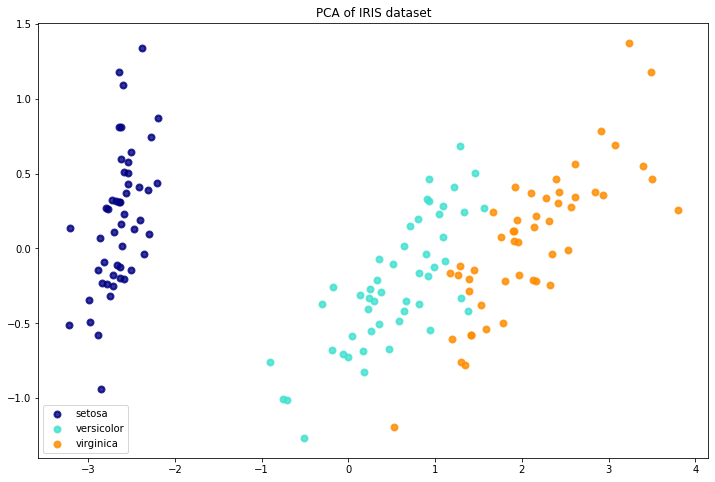

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

plt.figure(figsize=(12, 8))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()

Chúng ta có thể thấy PCA đã giảm chiều dữ liệu từ 4 chiều xuống 2 chiều. Khi visualize những lớp trên không gian hai chiều thì chúng ta thấy có sự phân biệt giữa các cụm theo loài hoa. Điều đó cho thấy PCA đã bảo toàn được thông tin của dữ liệu đầu vào rất tốt trên không gian thấp chiều.

# 6. Tổng kết

Như vậy qua bài này chúng ta đã cùng nhau tìm hiểu về phương pháp giảm chiều dữ liệu PCA. Đây là một phương pháp giảm chiều dữ liệu tuyến tính khá hiệu quả dựa trên phương pháp phân tích suy biến SVD ma trận hiệp phương sai. Các biến trong không gian giảm chiều sẽ là tổ hợp tuyến tính của các biến đầu vào gốc nhân với hệ véc tơ cơ sở của ma trận suy biến trái. Như vậy sử dụng PCA sẽ không cần phải bỏ sót biến và đồng thời giữ được thông tin về độ biến động của dữ liệu.

Ngoài ra chúng ta cũng được làm quen với các khái niệm về phép phân tích riêng, phép phân tích suy biến, hệ trực giao, hệ trực chuẩn và các đại lượng như véc tơ riêng tương ứng với trị riêng trong đại số tuyến tính. Đây là những kiến thức tương đối quan trọng và được ứng dụng nhiều trong đại số tuyến tính mà bạn đọc cần ghi nhớ.

# 7. Bài tập

Lựa chọn một trong các bộ dữ liệu sau:

* [BreastCancer](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) về chuẩn đoán ung thư vú.

* [diabetes](https://archive.ics.uci.edu/ml/datasets/diabetes) chuẩn đoán bệnh tiểu đường.

* [hmeq](https://www.kaggle.com/ajay1735/hmeq-data) phân loại hồ sơ cho vay mua nhà.

* [BonstonHousing](https://github.com/phamdinhkhanh/datasets/blob/master/BostonHousing.csv) dự báo giá nhà ở Bonston.

* [churn customer](https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset) dự đoán khách hàng rời bỏ.

Hãy thực hiện các bài tập sau:

1. Giảm chiều dữ liệu của bộ dữ liệu về còn 2 chiều.
2. Thực hiện visualization các nhóm dữ liệu theo 2 chiều và nhận xét.
3. Phát hiện các điểm outliers từ đồ thị visualize.

Tiếp theo, sử dụng bộ dữ liệu [movielen](https://www.kaggle.com/shubhammehta21/movie-lens-small-latest-dataset) hãy thực hiện:

4. phân tích suy biến SVD đối với ma trận rating.
5. Tìm biểu diễn của các bộ phim trong không gian thấp chiều.
6. Sử dụng cosine-similarity trên không gian thấp chiều, hãy xây dựng thuật toán khuyến nghị những bộ phim tương đồng dựa trên bộ phim mà tác giả đã xem.


# 8. Tài liệu

1. https://builtin.com/data-science/step-step-explanation-principal-component-analysis
2. https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
3. https://cs229.stanford.edu/notes2021fall/cs229-notes10.pdf
4. https://royalsocietypublishing.org/doi/10.1098/rsta.2015.0202
5. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/principal-component-analysis-pca/
6. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
7. https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py

